# Intro a ML con SCIKIT-LEARN

<https://scikit-learn.org/stable/>

# 1. Regresión Lineal

La regresión lineal es una técnica paramétrica de machine learning

En el caso que estemos usando una sola variable, x, sabemos que una línea necesita 2 parámetros. La fórmula para la regresión lineal con una sola variable x es:

y= Ax + B

El aprendizaje consiste en encontrar cuáles son los mejores parámetros (coeficientes) para los datos que tengamos. Los mejores coeficientes serán los que minimicen alguna medida de error. Para la regresión lineal usaremos el error cuadrático medio

https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/

https://www.iartificial.net/error-cuadratico-medio-para-regresion/



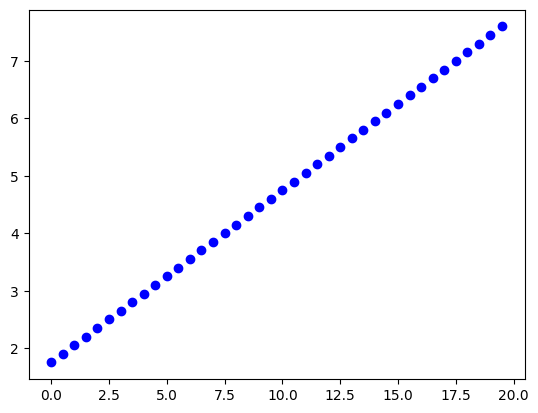

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn


#vamos a ver primero la función tal cual:
def f(x):
    y = 0.3*x + 1.75
    return y

x = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y = f(x) # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado
plt.scatter(x,y,label='data', color='blue')

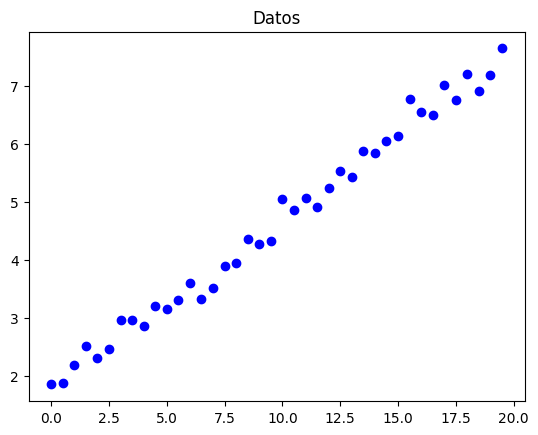

In [2]:
def f2(x):
    np.random.seed(42) # para poder reproducirlo
    y = 0.3*x + 1.75+ 0.2*np.random.randn(x.shape[0])
    return y

x2 = np.arange(0, 20, 0.5) # generamos valores x de 0 a 20 en intervalos de 0.5
y2 = f2(x2) # calculamos y a partir de la función que hemos generado
# hacemos un gráfico de los datos que hemos generado
plt.scatter(x2,y2,label='data', color='blue')
plt.title('Datos');

### Vamos a entrenar un modelo

In [5]:
from sklearn.linear_model import LinearRegression # Importamos la clase de Regresión Lineal de scikit-learn
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
regresion_lineal.fit(x2.reshape(-1,1), y2) # instruimos a la regresión lineal que aprenda de los datos (x,y)
# vemos los parámetros que ha estimado la regresión lineal

#fit() se utiliza para ajustar el modelo lineal a los datos. Hay dos argumentos pasados a .fit():

#x2.reshape(-1,1): x2 es presumiblemente un array de valores que representan la variable independiente en los datos.
#El método .reshape(-1, 1) cambia la forma de x2 para que sea un array de dos dimensiones con una columna y tantas
#filas como sea necesario. Esto se hace porque sklearn espera que las variables independientes (features) estén en
#formato de matriz (o array 2D), incluso si solo hay una variable independiente.

#y2: Es el array de valores que representan la variable dependiente.
print('A = ' + str(regresion_lineal.coef_) + ', B = ' + str(regresion_lineal.intercept_))

A = [0.29183522], B = 1.7858792525736682


Como se aprecia la regresión lineal casi ha averiguado los parámetros correctos:

    Estima 0.2918.. en lugar de 0.3 en el caso de A
    Estima 1.785879.. en vez de 1.75 en el caso de B

El error es normal debido a la cantidad de ruido que hemos introducido y a que hay muy pocos datos.

### Una vez que tenemos entrenado el modelo podemos hacer predicciones. usando el método predict de la clase LinearRegression. Por ejemplo, si quisiéramos saber qué valor de y corresponde para x=10

In [7]:
x_delquepredecir = np.array([10])
prediccion = regresion_lineal.predict(x_delquepredecir.reshape(-1,1))
print(prediccion)

[4.70423144]


In [8]:
#originalmente sería:
valor = 0.3*10 + 1.75
print(valor)

4.75


### Vamos a ver cómo de bueno es nuestro modelo

In [9]:
# Error cuadrático medio:

from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)

prediccion_entrenamiento = regresion_lineal.predict(x2.reshape(-1,1)) # Predecimos los valores y para los datos usados en el entrenamiento

mse = mean_squared_error(y_true = y2, y_pred = prediccion_entrenamiento) # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)

rmse = np.sqrt(mse) # La raíz cuadrada del MSE es el RMSE
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.033185220129279
Raíz del Error Cuadrático Medio (RMSE) = 0.18216810952875093


El Error Medio Cuadrático (MSE, por sus siglas en inglés, Mean Squared Error) es una medida de la calidad de un estimador. Es siempre no negativo, y valores más bajos indican un mejor ajuste del modelo a los datos. Se calcula como el promedio de los cuadrados de las diferencias entre los valores observados (reales) y los valores predichos por el modelo

![error%20cuadratico%20medio.png](attachment:error%20cuadratico%20medio.png)

### Coeficiente de determinación $R^2$

El coeficiente de determinación $R^2$ nos dice la proporción de los resultados que puede explicarse por el modelo, y por tanto da una medida de su calidad. Está entre 0 y 1, siendo 1 lo mejor.

Empleamos el método score:

In [10]:
r2 = regresion_lineal.score(x2.reshape(-1,1), y2)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.9884385646298068


### Acabamos pintándolo

In [11]:
def f3(x):
    y = 0.29183522*x + 1.78587925257366825
    return y

y3 = f3(x2) # calculamos y a partir de la función que hemos generado

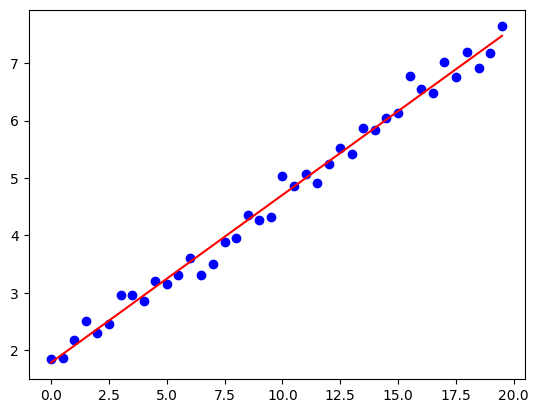

In [12]:
plt.scatter(x2,y2,label='data', color='blue')
plt.plot(x2,y3,label='regresion', color='red')


# 2 Classification

Supervised learning algorithm.

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

We are using the Titanic dataset:

- [Kaggle](https://www.kaggle.com/pavlofesenko/titanic-extended)

In [14]:
titanic = pd.read_csv('ml_titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [15]:
titanic['Sex'] = titanic['Sex'].astype('category').cat.codes # para categorizar variables en números
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [16]:
titanic.shape

(887, 8)

In [17]:
titanic['Survived'].sum()

342

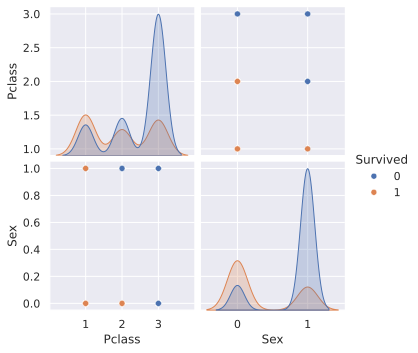

In [18]:
SELECTION = ['Pclass', 'Sex', 'Survived'] #hago un pequeño dataset con solo algunas columnas
fig = sns.pairplot(titanic[SELECTION], hue='Survived') #, kind='kde') #Quiero ver si el ir en una case o el género influye en sobrevivir o no

### Prepare for training

In [19]:
INPUTS = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
OUTPUT = 'Survived'
X = titanic[INPUTS]
y = titanic[OUTPUT]

In [20]:
X

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,2,1,27.0,0,0,13.0000
883,1,0,19.0,0,0,30.0000
884,3,0,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


In [21]:
X_encoded = pd.get_dummies(X, columns=['Sex'])
# Ahora X_train_encoded tiene columnas adicionales: 'gender_male' y 'gender_female',
# donde cada una tiene 1 o 0 si el registro es masculino o femenino, respectivamente

In [22]:
X_encoded

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_0,Sex_1
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,0,1
883,1,19.0,0,0,30.0000,1,0
884,3,7.0,1,2,23.4500,1,0
885,1,26.0,0,0,30.0000,0,1


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

In [25]:
X_train.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_0,Sex_1
363,3,30.0,0,0,7.2500,0,1
255,1,38.0,0,0,79.2000,1,0
476,3,2.0,0,1,12.2875,1,0
271,1,37.0,0,1,29.7000,0,1
553,1,48.0,1,0,39.6000,1,0


In [26]:
y_train

363    0
255    1
476    1
271    0
553    1
      ..
835    1
192    1
629    1
559    0
684    0
Name: Survived, Length: 709, dtype: int64

In [30]:
### Decision Tree:

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train);

### Plot the tree

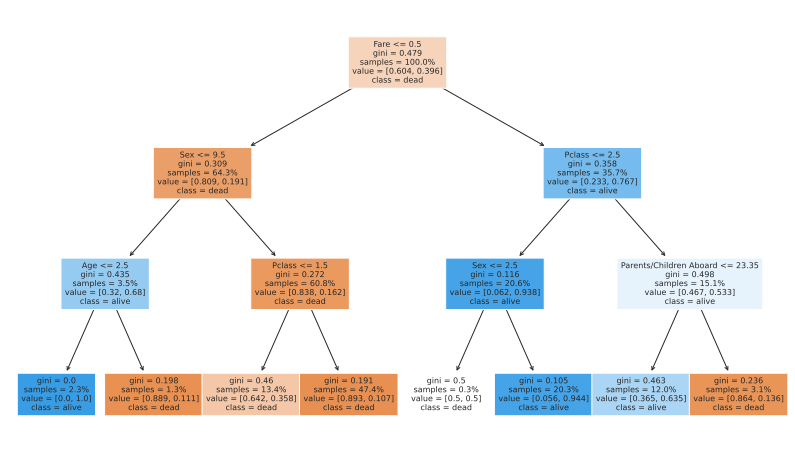

In [31]:
fig, ax = plt.subplots(1, 1, figsize=[14, 8])
plot_tree(model,
          feature_names=X.columns.tolist(),  # Convertir a lista
          filled=True,
          proportion=True,
          class_names=['dead', 'alive'],  # Convertir a lista
          fontsize=8, ax=ax)
plt.show()

Un árbol de decisión se compone de nodos que representan preguntas o condiciones basadas en las características (variables) de tus datos. Hay dos tipos de nodos: nodos internos (o nodos de decisión) y nodos hoja (o nodos terminales).

Nodos Internos:

Condición de división: Cada nodo interno representa una condición de división sobre una característica. Esto divide el conjunto de datos en dos grupos basados en si cumplen o no con la condición.
Gini/Impureza: Muestra la impureza del nodo, un valor que indica qué tan mezcladas están las clases dentro del nodo. Un valor más bajo indica una mejor separación de las clases.
Samples: Indica el número de muestras en el nodo.
Value: Muestra el número de muestras de cada clase que hay en el nodo.
Class: El nombre de la clase que predominará en ese nodo si se convierte en un nodo hoja.
Nodos Hoja:

Class: La clase que se predice para las muestras que llegan a este nodo.
Samples: El número de muestras en el nodo.
Value: Muestra el número de muestras de cada clase en el nodo.
Proportion: Si proportion=True, se muestra la proporción de muestras de cada clase en el nodo.
Cómo Leer el Árbol
Inicio: Comienzas en el nodo raíz (la parte superior del árbol) y te mueves hacia abajo siguiendo las condiciones que se cumplen con base en las características de tus datos.
División: En cada nodo interno, revisas la condición (por ejemplo, "Sexo <= 0.5"). Si la condición es verdadera para tu muestra, te mueves hacia el hijo izquierdo del nodo; si es falsa, hacia el hijo derecho.
Coloración: Los nodos pueden estar coloreados (si filled=True) para indicar la clase predominante. Los colores más intensos indican una mayor proporción de muestras de una clase específica en ese nodo.
Predicción: Continúas moviéndote a través del árbol hasta llegar a un nodo hoja, que te da la predicción de la clase para tu muestra.
Por ejemplo, si estás clasificando si los pasajeros del Titanic sobrevivieron ('alive') o no ('dead') y comienzas en el nodo raíz que pregunta si "Sexo <= 0.5" (asumiendo que masculino=0 y femenino=1), una muestra con Sexo=1 (femenino) se movería hacia el hijo derecho del nodo. Continuarías este proceso hasta llegar a un nodo hoja, que indicaría la predicción de supervivencia basada en las características de esa muestra.

Ejemplo Práctico
Si el nodo raíz divide por la característica "Edad <= 30" y tienes una muestra con una edad de 25, seguirías hacia el hijo izquierdo de ese nodo, aplicando la misma lógica hasta llegar a un nodo hoja, donde se te dará la predicción final (por ejemplo, 'alive').

Interpretar un árbol de decisión te permite entender cómo el modelo toma decisiones basadas en las características de los datos, lo cual es útil para evaluar la importancia de las características y para explicar las predicciones del modelo.







### Evaluate performance

In [32]:
y_predict = model.predict(X_test)

In [33]:
results = pd.DataFrame({'truth': y_test, 'prediction': y_predict})
results

,truth,prediction
14,0,1
158,0,0
762,0,0
740,1,0
482,0,0
...,...,...
834,1,0
672,0,0
181,0,0
631,0,0


### Confusion matrix
- [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

Be careful, wikipedia and scikit-learn swap the axes.

![matrizconfusi%C3%B3n.JPG](attachment:matrizconfusi%C3%B3n.JPG)

In [34]:
confusion_matrix(y_test, y_predict)

array([[100,  17],
       [ 18,  43]])

### Accuracy

- [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

In [35]:
accuracy_score(y_test, y_predict)

0.8033707865168539

### Precision
- [precision_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [36]:
precision_score(y_test, y_predict)

0.7166666666666667

### Recall
- [recall_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

In [37]:
recall_score(y_test, y_predict)

0.7049180327868853

---
# 2.Regresión Logística

Supervised learning algorithm.

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

We are using the Iris flower dataset:

- [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [39]:
iris = pd.read_csv('ml_iris.csv', index_col=0)
iris['Species'] = iris['Species'].astype('category')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


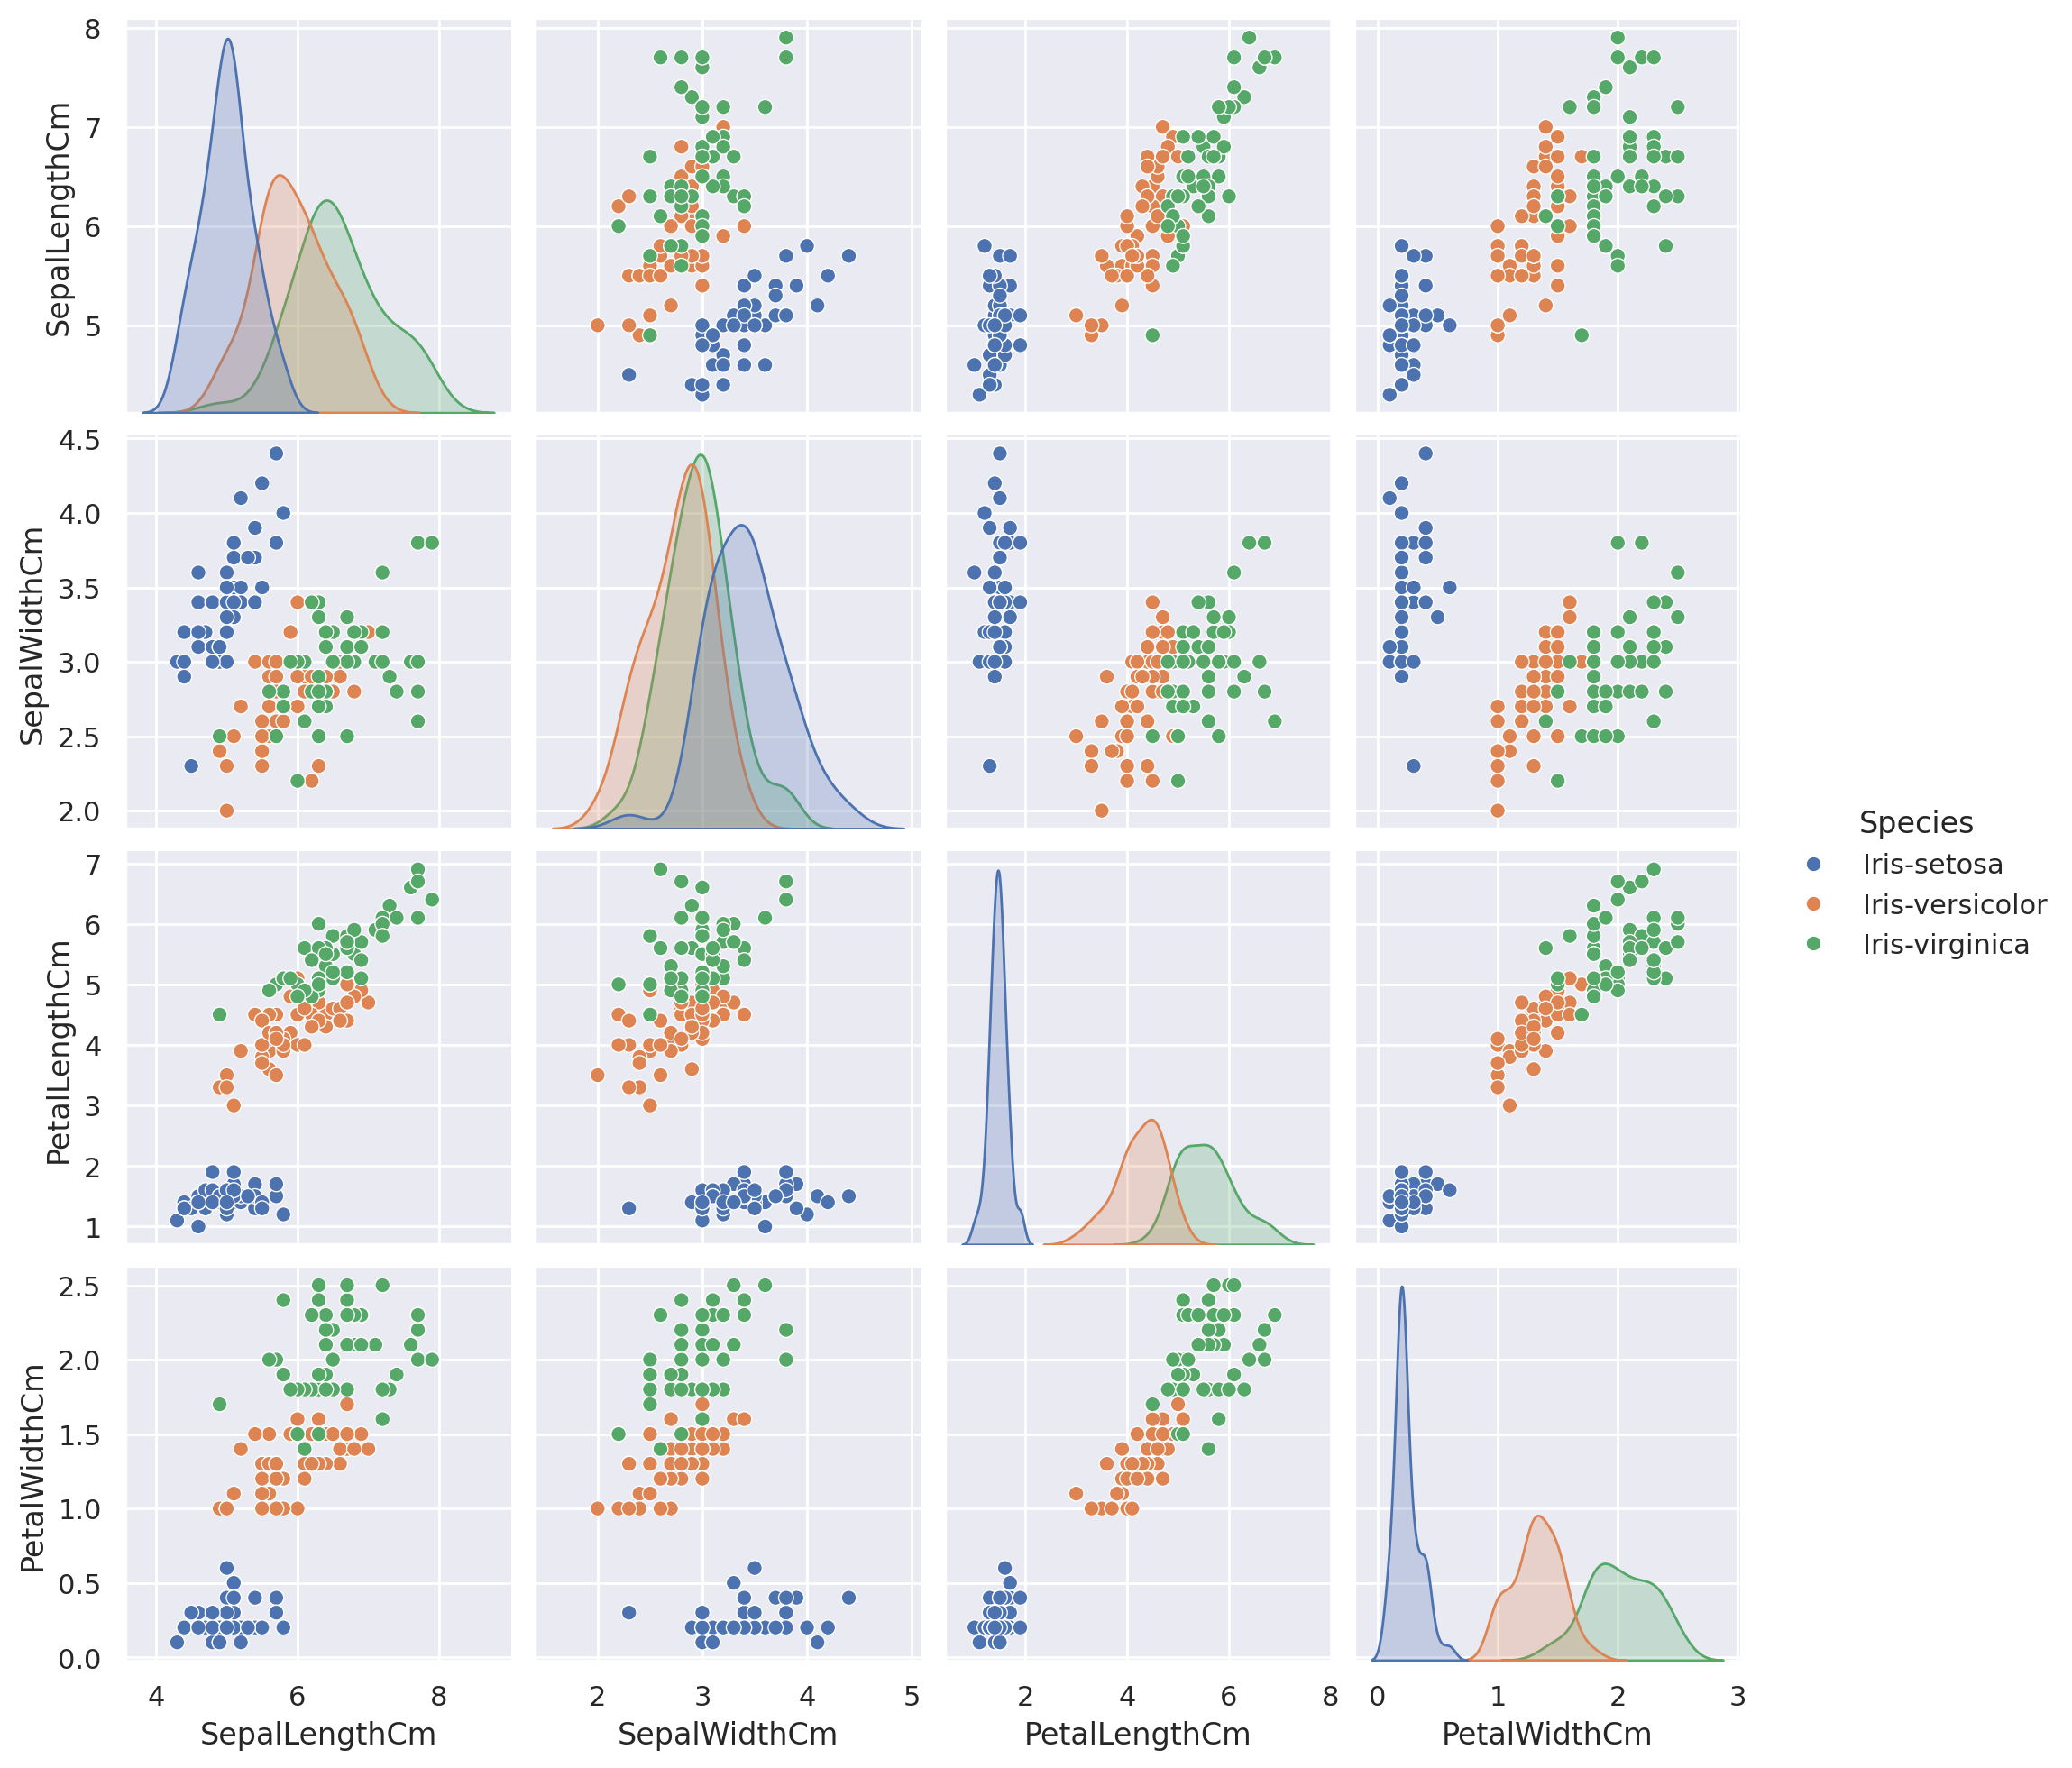

In [40]:
fig = sns.pairplot(iris, hue='Species')

In [41]:
INPUTS = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
OUTPUT = 'Species'
X = iris[INPUTS]
y = iris[OUTPUT]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
138,6.4,3.1,5.5,1.8
85,5.4,3.0,4.5,1.5
28,5.2,3.5,1.5,0.2
128,6.1,3.0,4.9,1.8
133,6.4,2.8,5.6,2.2


In [44]:
y_train

Id
138     Iris-virginica
85     Iris-versicolor
28         Iris-setosa
128     Iris-virginica
133     Iris-virginica
            ...       
10         Iris-setosa
104     Iris-virginica
68     Iris-versicolor
118     Iris-virginica
48         Iris-setosa
Name: Species, Length: 120, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

### Logistic Regression

- [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

In [45]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train);

In [46]:
y_predict = model.predict(X_test)

In [47]:
results = pd.DataFrame({'truth': y_test, 'prediction': y_predict})
results

,truth,prediction
Id,,
115,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
34,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
101,Iris-virginica,Iris-virginica
41,Iris-setosa,Iris-setosa
87,Iris-versicolor,Iris-versicolor
77,Iris-versicolor,Iris-versicolor


In [48]:
accuracy_score(y_test, y_predict)

0.9666666666666667

In [49]:
model.coef_

array([[ 0.41682398,  1.34687247, -2.15760284, -0.98058923],
       [ 0.22719571, -1.32234908,  0.58097932, -1.25562927],
       [-1.559254  , -1.34663487,  2.2897358 ,  2.25775566]])

In [50]:
model.intercept_

array([ 0.24822199,  1.07209792, -1.15180528])